In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
# finding duplicated rows
df.duplicated().sum()

146

In [11]:
# removing duplicated rows
df.drop_duplicates()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
883,0,28.0,10.5000
885,0,39.0,29.1250
887,1,19.0,30.0000
889,1,26.0,30.0000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [17]:
# checking null values
print(df['Survived'].isnull().sum())
print(df['Age'].isnull().sum())
print(df['Fare'].isnull().sum())

0
177
0


In [19]:
# handling null values in age columns by mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


train test split

In [21]:
x=df.iloc[: , 1:3]
y=df.iloc[:,0]

In [22]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=42)

In [27]:
x_train.shape

(712, 2)

In [28]:
x_test.shape

(179, 2)

In [29]:
y_train.shape

(712,)

In [30]:
y_test.shape

(179,)

probability distribution and qq plot(for age)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'QQ Plot')

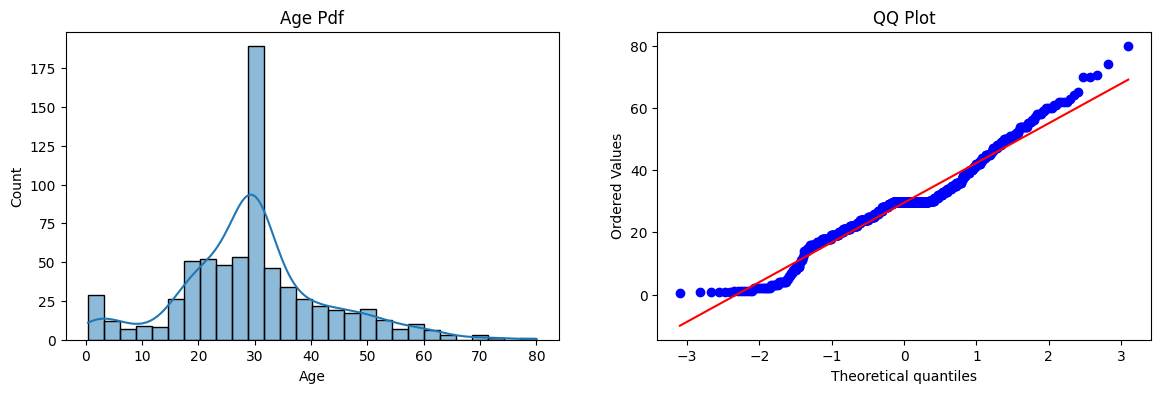

In [113]:
plt.figure(figsize=(14,4))
plt.subplot(121)
# sns.distplot(x_train['Age']) # change in new version
sns.histplot(x_train['Age'],kde=True)
plt.title('Age Pdf')

plt.subplot(122)
scipy.stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQ Plot')

probability distribution and qq plot(for fare)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'QQ Plot')

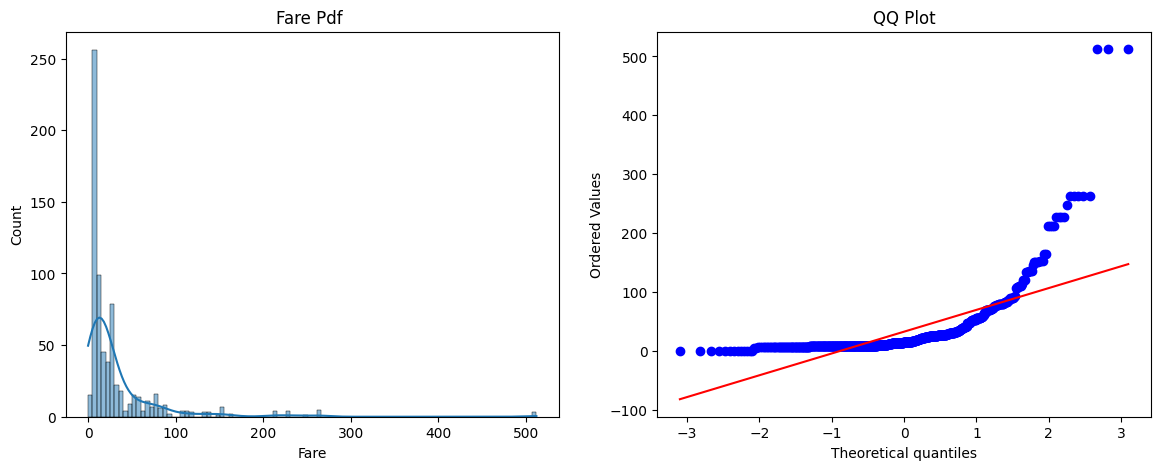

In [115]:
plt.figure(figsize=(14,5))
plt.subplot(121)
# sns.distplot(x_train['Fare']) change in new version
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare Pdf ')

plt.subplot(122)
scipy.stats.probplot(x_train['Fare'],dist='norm', plot=plt)
plt.title('QQ Plot')

log transform

In [94]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)

x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

before transform 

In [95]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


after transformed

In [96]:
x_train_transformed

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


model before transformation

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [99]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred1,y_test))
print(accuracy_score(y_pred2,y_test))

0.6480446927374302
0.6703910614525139


model after transformation

In [101]:
clf1_trans=LogisticRegression()
clf2_trans=DecisionTreeClassifier()

clf1_trans.fit(x_train_transformed,y_train)
clf2_trans.fit(x_train_transformed,y_train)
y_trans_pred1=clf1.predict(x_test_transformed)
y_trans_pred2=clf2.predict(x_test_transformed)

In [102]:
print(accuracy_score(y_trans_pred1,y_test))
print(accuracy_score(y_trans_pred2,y_test))

0.5865921787709497
0.4134078212290503


probability distribution and qq plot after transformation

C:\Users\Asus\AppData\Local\Temp\ipykernel_3844\2681525107.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: Future

Text(0.5, 1.0, 'Age pdf after transformation')

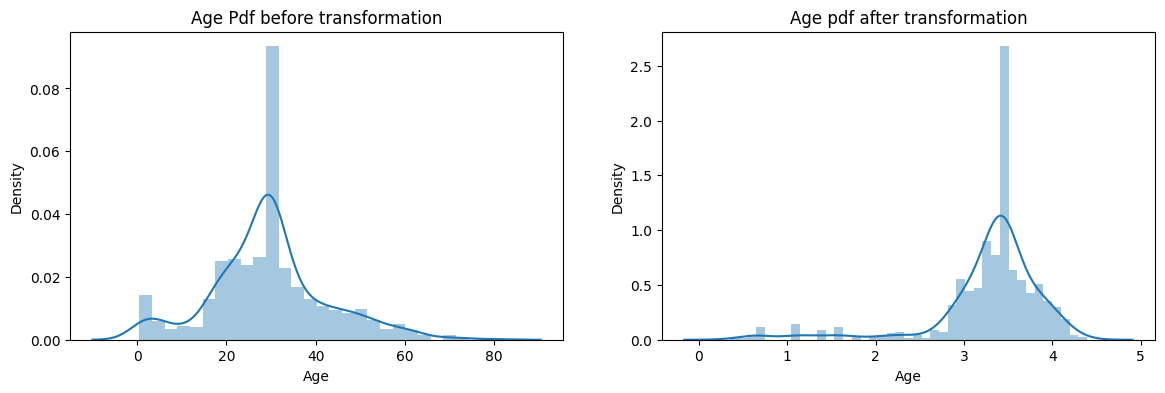

In [108]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age Pdf before transformation')

plt.subplot(122)
sns.distplot(x_train_transformed['Age'])
plt.title('Age pdf after transformation')

Text(0.5, 1.0, 'Age qq plot after transformation')

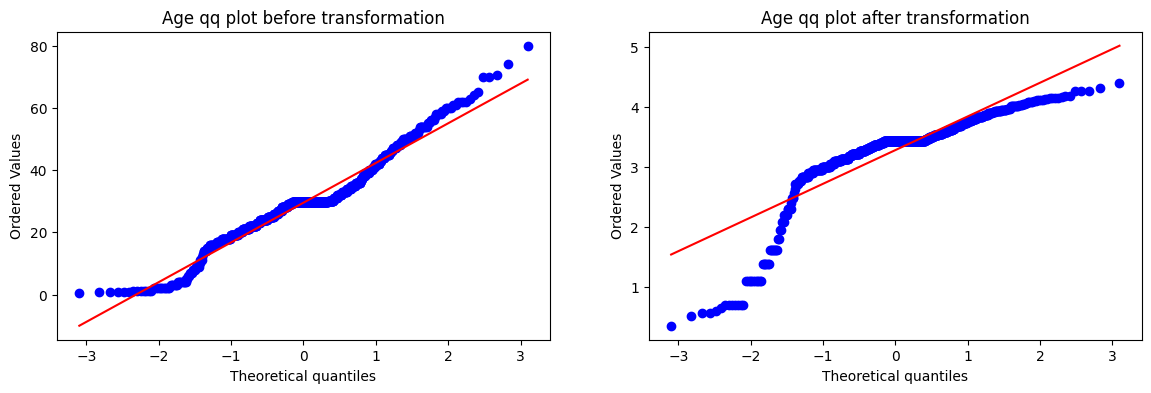

In [109]:
plt.figure(figsize=(14,4))
plt.subplot(121)
scipy.stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age qq plot before transformation')

plt.subplot(122)
scipy.stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age qq plot after transformation')

Text(0.5, 1.0, 'Fare qq plot after transformation')

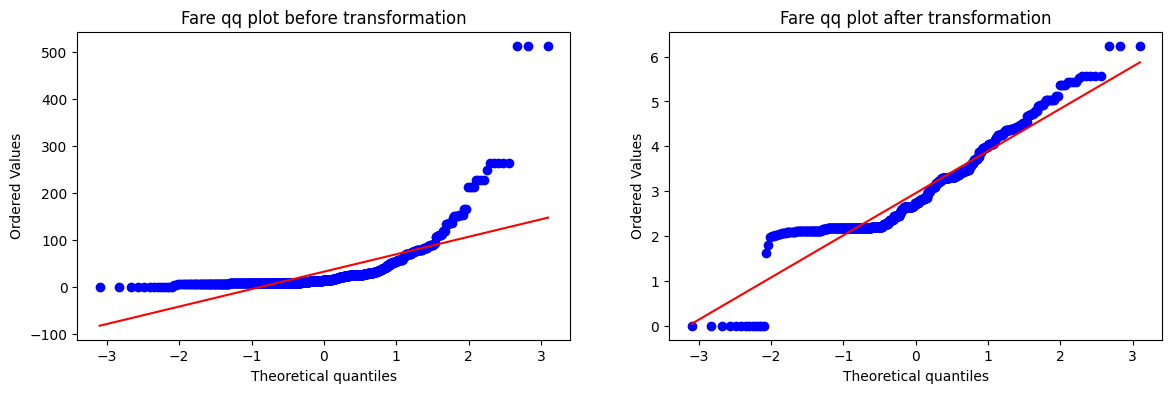

In [110]:
plt.figure(figsize=(14,4))
plt.subplot(121)
scipy.stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare qq plot before transformation')

plt.subplot(122)
scipy.stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare qq plot after transformation')

transformation on specific column

In [116]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('tnf',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [118]:
x_train_transformed1=trf.fit_transform(x_train)
x_test_transformed1=trf.fit_transform(x_test)

In [119]:
x_train_transformed1

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

In [120]:
clf1_trans1=LogisticRegression()
clf2_trans2=DecisionTreeClassifier()

clf1_trans1.fit(x_train_transformed1,y_train)
clf2_trans2.fit(x_train_transformed1,y_train)
y_trans_pred1=clf1_trans1.predict(x_test_transformed1)
y_trans_pred2=clf2_trans2.predict(x_test_transformed1)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [121]:
print(accuracy_score(y_trans_pred1,y_test))
print(accuracy_score(y_trans_pred2,y_test))

0.5307262569832403
0.4972067039106145


NOW YOU CAN TRY ALL THE TRANSFORMERS AND SEE WHICH IS GIVING THE BEST ACCURACY AND BEST MODEL

In [122]:
from sklearn.model_selection import cross_val_score
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    scipy.stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    scipy.stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

no transformation

Accuracy 0.6589013732833957


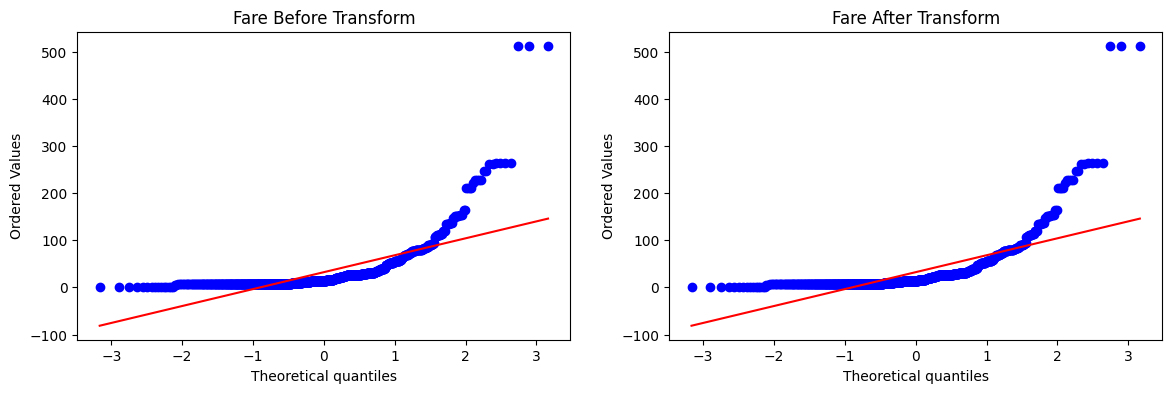

In [123]:
apply_transform(lambda x: x)

square transformation

Accuracy 0.6442446941323345


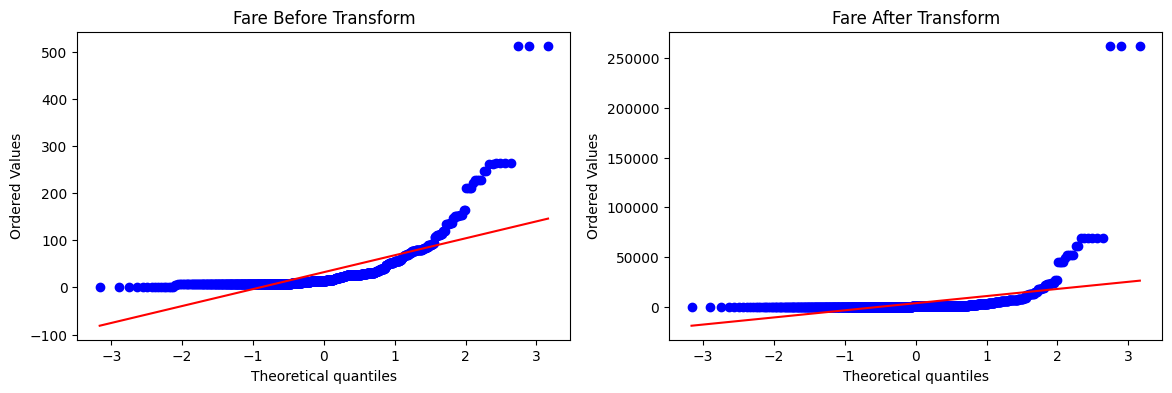

In [124]:
apply_transform(lambda x: x**2)

square root transformation

Accuracy 0.6611485642946316


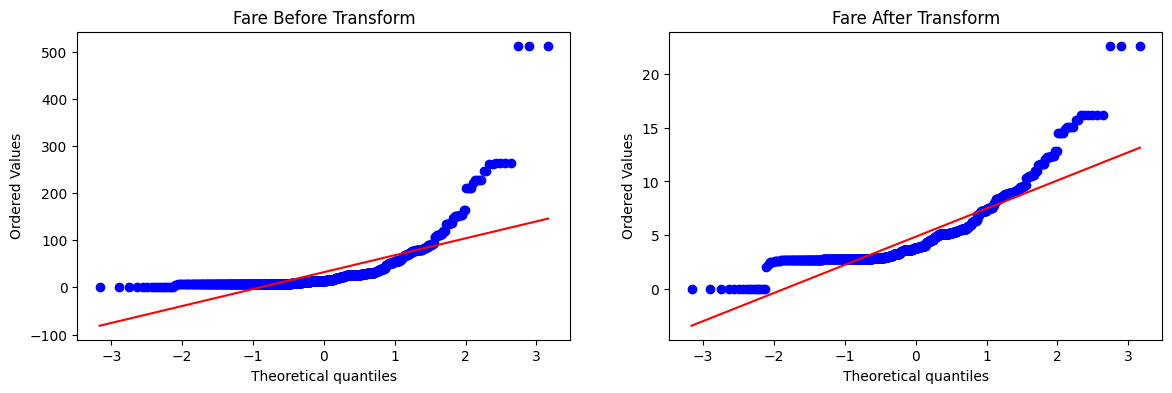

In [125]:
apply_transform(lambda x: x**.5)

Accuracy 0.61729088639201


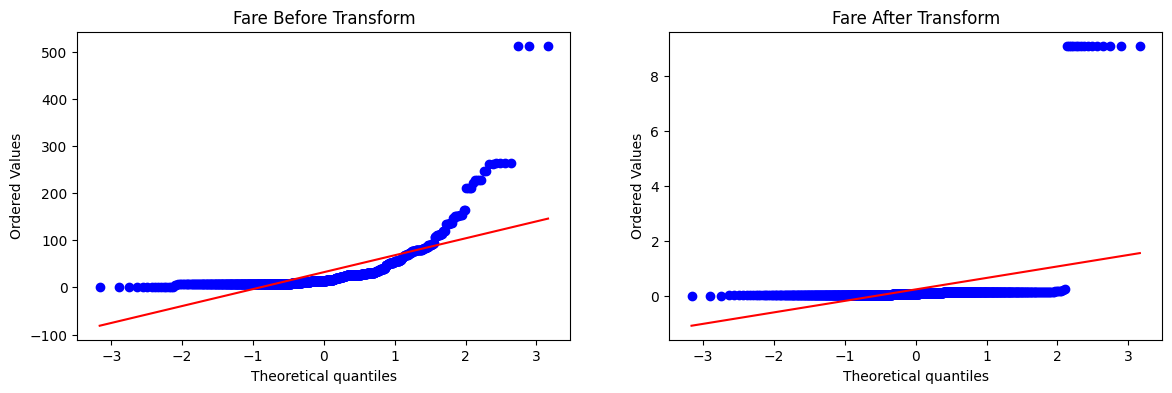

In [131]:
apply_transform(lambda x: 1/(x+.11))